In [97]:
library(psych)
library(EFA.dimensions) 
library(dplyr)
library(corrr)
library(irr)
library(lavaan)
library(semPlot)

setwd("/Users/mayanksharma/Desktop/SEL Screener/Final Student Qnnaire")

In [98]:
data=read.csv("EFAData_EFA.csv")

In [99]:
head(data)

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,2,2,2,3,2,3,3,2,3
2,3,1,1,2,1,3,1,3,3,3,3
3,3,2,2,1,2,3,2,3,3,3,3
4,2,2,2,2,2,2,3,3,3,3,3
5,3,1,1,1,2,3,2,3,3,3,3
6,2,2,2,2,2,3,2,3,3,3,2


In [40]:
length(data$Item11)

[1] 2844

# Normality Checking and Correlations

In [44]:
library(MVN)
result <- mvn(data = data, mvnTest = "hz")
result

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded



$multivariateNormality
           Test HZ p value MVN
1 Henze-Zirkler 44       0  NO

$univariateNormality
           Test  Variable Statistic   p value Normality
1  Shapiro-Wilk   Item1      0.7658  0.0033      NO    
2  Shapiro-Wilk   Item2      0.7982  0.0089      NO    
3  Shapiro-Wilk   Item3      0.7568  0.0025      NO    
4  Shapiro-Wilk   Item4      0.7578  0.0026      NO    
5  Shapiro-Wilk   Item5      0.7511  0.0021      NO    
6  Shapiro-Wilk   Item6      0.8776  0.0971      YES   
7  Shapiro-Wilk   Item7      0.5391  <0.001      NO    
8  Shapiro-Wilk   Item8      0.8920  0.1473      YES   
9  Shapiro-Wilk   Item9      0.8614   0.06       YES   
10 Shapiro-Wilk  Item10      0.8879  0.1309      YES   
11 Shapiro-Wilk  Item11      0.8031  0.0103      NO    

$Descriptives
        n       Mean   Std.Dev Median   Min Max   25th  75th      Skew
Item1  11 0.14181818 0.3187105   0.15 -0.17   1 -0.070 0.200 1.5928018
Item2  11 0.10909091 0.3550621  -0.06 -0.19   1 -0.125 0.250 1.3062056
Item3  11 0.10272727 0.3466436  -0.04 -0.16   1 -0.120 0.210 1.4831889
Item4  11 0.09818182 0.3376631  -0.05 -0.19   1 -0.100 0.180 1.5879352
Item5  11 0.08636364 0.3419729  -0.04 -0.18   1 -0.150 0.175 1.5876338
Item6  11 0.17454545 0.3523454   0.15 -0.18   1 -0.130 0.330 0.9159816
Item7  11 0.15363636 0.2869241   0.06 -0.01   1  0.030 0.135 2.2784368
Item8  11 0.22000000 0.3541469   0.23 -0.13   1 -0.085 0.390 0.7634897
Item9  11 0.17909091 0.3354536   0.17 -0.18   1 -0.055 0.330 1.1036648
Item10 11 0.20090909 0.3795380   0.24 -0.19   1 -0.160 0.360 0.5819827
Item11 11 0.18818182 0.3135225   0.17 -0.11   1 -0.050 0.245 1.3652288
          Kurtosis
Item1   1.93600303
Item2   0.77172595
Item3   1.21731364
Item4   1.74630356
Item5   1.75190016
Item6   0.05314845
Item7   3.90958580
Item8  -0.48316768
Item9   0.51547892
Item10 -0.77466209
Item11  1.29555440

In [45]:
result <- mvn(data = data, mvnTest = "mardia")
result

$multivariateNormality
             Test         Statistic              p value Result
1 Mardia Skewness   221.15229180738    0.998250853325916    YES
2 Mardia Kurtosis -3.51792588273358 0.000434933822132333     NO
3             MVN              <NA>                 <NA>     NO

$univariateNormality
           Test  Variable Statistic   p value Normality
1  Shapiro-Wilk   Item1      0.7658  0.0033      NO    
2  Shapiro-Wilk   Item2      0.7982  0.0089      NO    
3  Shapiro-Wilk   Item3      0.7568  0.0025      NO    
4  Shapiro-Wilk   Item4      0.7578  0.0026      NO    
5  Shapiro-Wilk   Item5      0.7511  0.0021      NO    
6  Shapiro-Wilk   Item6      0.8776  0.0971      YES   
7  Shapiro-Wilk   Item7      0.5391  <0.001      NO    
8  Shapiro-Wilk   Item8      0.8920  0.1473      YES   
9  Shapiro-Wilk   Item9      0.8614   0.06       YES   
10 Shapiro-Wilk  Item10      0.8879  0.1309      YES   
11 Shapiro-Wilk  Item11      0.8031  0.0103      NO    

$Descriptives
        n       Mean   Std.Dev Median   Min Max   25th  75th      Skew
Item1  11 0.14181818 0.3187105   0.15 -0.17   1 -0.070 0.200 1.5928018
Item2  11 0.10909091 0.3550621  -0.06 -0.19   1 -0.125 0.250 1.3062056
Item3  11 0.10272727 0.3466436  -0.04 -0.16   1 -0.120 0.210 1.4831889
Item4  11 0.09818182 0.3376631  -0.05 -0.19   1 -0.100 0.180 1.5879352
Item5  11 0.08636364 0.3419729  -0.04 -0.18   1 -0.150 0.175 1.5876338
Item6  11 0.17454545 0.3523454   0.15 -0.18   1 -0.130 0.330 0.9159816
Item7  11 0.15363636 0.2869241   0.06 -0.01   1  0.030 0.135 2.2784368
Item8  11 0.22000000 0.3541469   0.23 -0.13   1 -0.085 0.390 0.7634897
Item9  11 0.17909091 0.3354536   0.17 -0.18   1 -0.055 0.330 1.1036648
Item10 11 0.20090909 0.3795380   0.24 -0.19   1 -0.160 0.360 0.5819827
Item11 11 0.18818182 0.3135225   0.17 -0.11   1 -0.050 0.245 1.3652288
          Kurtosis
Item1   1.93600303
Item2   0.77172595
Item3   1.21731364
Item4   1.74630356
Item5   1.75190016
Item6   0.05314845
Item7   3.90958580
Item8  -0.48316768
Item9   0.51547892
Item10 -0.77466209
Item11  1.29555440

In [46]:
res=round(cor(data, use = "complete.obs"),2)

In [68]:
res

,SELOS-1,SELOS-2,SELOS-3,SELOS-4,SELOS-5,SELOS-6,SELOS-7,SELOS-8,SELOS-9,SELOS-10,SELOS-11
SELOS-1: I find it easy to make friends and be with people,1.00,-0.11,-0.08,-0.17,-0.06,0.15,0.04,0.23,0.17,0.24,0.15
SELOS-2: I experience sadness and unhappiness often,-0.11,1.00,0.38,0.26,0.24,-0.17,0.10,-0.12,-0.13,-0.19,-0.06
SELOS-3: I often get angry and lose my temper,-0.08,0.38,1.00,0.21,0.21,-0.16,0.00,-0.13,-0.04,-0.15,-0.11
SELOS-4: I prefer to be alone rather than with people my age,-0.17,0.26,0.21,1.00,0.14,-0.10,0.15,-0.05,-0.07,-0.19,-0.10
SELOS-5: I find it difficult to concentrate on my studies/work at hand,-0.06,0.24,0.21,0.14,1.00,-0.18,0.12,-0.13,-0.18,-0.17,-0.04
SELOS-6: I think before I do things,0.15,-0.17,-0.16,-0.10,-0.18,1.00,0.06,0.42,0.30,0.36,0.24
SELOS-7: Others around me bully me,0.04,0.10,0.00,0.15,0.12,0.06,1.00,0.03,-0.01,0.03,0.17
SELOS-8: I pay attention to the feelings of others,0.23,-0.12,-0.13,-0.05,-0.13,0.42,0.03,1.00,0.36,0.56,0.25
SELOS-9: I talk easily with teachers,0.17,-0.13,-0.04,-0.07,-0.18,0.30,-0.01,0.36,1.00,0.36,0.21
SELOS-10: I like to help others,0.24,-0.19,-0.15,-0.19,-0.17,0.36,0.03,0.56,0.36,1.00,0.36


In [69]:
res[res==1.00]=0.00

In [70]:
res

,SELOS-1,SELOS-2,SELOS-3,SELOS-4,SELOS-5,SELOS-6,SELOS-7,SELOS-8,SELOS-9,SELOS-10,SELOS-11
SELOS-1: I find it easy to make friends and be with people,0.00,-0.11,-0.08,-0.17,-0.06,0.15,0.04,0.23,0.17,0.24,0.15
SELOS-2: I experience sadness and unhappiness often,-0.11,0.00,0.38,0.26,0.24,-0.17,0.10,-0.12,-0.13,-0.19,-0.06
SELOS-3: I often get angry and lose my temper,-0.08,0.38,0.00,0.21,0.21,-0.16,0.00,-0.13,-0.04,-0.15,-0.11
SELOS-4: I prefer to be alone rather than with people my age,-0.17,0.26,0.21,0.00,0.14,-0.10,0.15,-0.05,-0.07,-0.19,-0.10
SELOS-5: I find it difficult to concentrate on my studies/work at hand,-0.06,0.24,0.21,0.14,0.00,-0.18,0.12,-0.13,-0.18,-0.17,-0.04
SELOS-6: I think before I do things,0.15,-0.17,-0.16,-0.10,-0.18,0.00,0.06,0.42,0.30,0.36,0.24
SELOS-7: Others around me bully me,0.04,0.10,0.00,0.15,0.12,0.06,0.00,0.03,-0.01,0.03,0.17
SELOS-8: I pay attention to the feelings of others,0.23,-0.12,-0.13,-0.05,-0.13,0.42,0.03,0.00,0.36,0.56,0.25
SELOS-9: I talk easily with teachers,0.17,-0.13,-0.04,-0.07,-0.18,0.30,-0.01,0.36,0.00,0.36,0.21
SELOS-10: I like to help others,0.24,-0.19,-0.15,-0.19,-0.17,0.36,0.03,0.56,0.36,0.00,0.36


In [53]:
res=data

In [54]:
write.csv(res,"corr.csv")

In [71]:
rownames(res) <- c("SELOS-1: I find it easy to make friends and be with people", "SELOS-2: I experience sadness and unhappiness often", "SELOS-3: I often get angry and lose my temper", "SELOS-4: I prefer to be alone rather than with people my age", "SELOS-5: I find it difficult to concentrate on my studies/work at hand","SELOS-6: I think before I do things","SELOS-7: Others around me bully me","SELOS-8: I pay attention to the feelings of others","SELOS-9: I talk easily with teachers","SELOS-10: I like to help others","SELOS-11: I think feelings matter in learning")
colnames(res) <- c("SELOS-1", "SELOS-2", "SELOS-3", "SELOS-4", "SELOS-5","SELOS-6","SELOS-7","SELOS-8","SELOS-9","SELOS-10","SELOS-11")

In [72]:
res

,SELOS-1,SELOS-2,SELOS-3,SELOS-4,SELOS-5,SELOS-6,SELOS-7,SELOS-8,SELOS-9,SELOS-10,SELOS-11
SELOS-1: I find it easy to make friends and be with people,0.00,-0.11,-0.08,-0.17,-0.06,0.15,0.04,0.23,0.17,0.24,0.15
SELOS-2: I experience sadness and unhappiness often,-0.11,0.00,0.38,0.26,0.24,-0.17,0.10,-0.12,-0.13,-0.19,-0.06
SELOS-3: I often get angry and lose my temper,-0.08,0.38,0.00,0.21,0.21,-0.16,0.00,-0.13,-0.04,-0.15,-0.11
SELOS-4: I prefer to be alone rather than with people my age,-0.17,0.26,0.21,0.00,0.14,-0.10,0.15,-0.05,-0.07,-0.19,-0.10
SELOS-5: I find it difficult to concentrate on my studies/work at hand,-0.06,0.24,0.21,0.14,0.00,-0.18,0.12,-0.13,-0.18,-0.17,-0.04
SELOS-6: I think before I do things,0.15,-0.17,-0.16,-0.10,-0.18,0.00,0.06,0.42,0.30,0.36,0.24
SELOS-7: Others around me bully me,0.04,0.10,0.00,0.15,0.12,0.06,0.00,0.03,-0.01,0.03,0.17
SELOS-8: I pay attention to the feelings of others,0.23,-0.12,-0.13,-0.05,-0.13,0.42,0.03,0.00,0.36,0.56,0.25
SELOS-9: I talk easily with teachers,0.17,-0.13,-0.04,-0.07,-0.18,0.30,-0.01,0.36,0.00,0.36,0.21
SELOS-10: I like to help others,0.24,-0.19,-0.15,-0.19,-0.17,0.36,0.03,0.56,0.36,0.00,0.36


In [76]:
library(corrplot)
cor.mtest <- function(mat, ...)
{
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat<- matrix(NA, n, n)
  diag(p.mat) <- 0
  for (i in 1:(n - 1)) 
  {
    for (j in (i + 1):n)
    {
      tmp <- cor.test(mat[, i], mat[, j], ...)
      p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
    }
  }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
  
# matrix of the p-value of the correlation
p.mat <- cor.mtest(data)
head(p.mat[, 1:5])


par(mfrow=c(1,2))

#png(height=1000, width=1300, pointsize=15, dpi=200, file="overlap.png")
tiff("test.tiff", units="in", width=13, height=7, pointsize=11, res=300)


palette=colorRampPalette(c("#da3a45","white","#468598"))(10)
#corrplot(res2, type = "upper", order = "original", 
         #p.mat = p.mat, sig.level = 0.05,cl.lim = c(-0.7, 0.7), is.corr = FALSE,diag=FALSE,tl.col = "black", tl.srt = 45, col= palette )
corrplot(res, type = "upper", order = "original", 
         p.mat = p.mat, sig.level = 0.05,cl.lim = c(-0.3, 0.6), is.corr = FALSE,diag=TRUE,tl.col = "black", tl.srt = 45, col= palette )
    
dev.off()

,Item1,Item2,Item3,Item4,Item5
Item1,0.00000000,0.09020053,0.14087927,0.0536519,0.20556730
Item2,0.09020053,0.00000000,0.02204457,0.1010508,0.11154697
Item3,0.14087927,0.02204457,0.00000000,0.1750516,0.16742835
Item4,0.05365190,0.10105078,0.17505164,0.0000000,0.30338061
Item5,0.20556730,0.11154697,0.16742835,0.3033806,0.00000000
Item6,0.33730353,0.01899178,0.02881465,0.0864253,0.02706711


pdf 
  2

# Prerequisite Testing for EFA

In [61]:
KMO(data)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.76
MSA for each item = 
 Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8  Item9 Item10 Item11 
  0.85   0.72   0.69   0.70   0.79   0.84   0.52   0.74   0.84   0.76   0.78 

In [62]:
cortest.bartlett(data)

Warning message in cortest.bartlett(data):
“n not specified, 100 used”


$chisq
[1] 152.2584

$p.value
[1] 4.578796e-11

$df
[1] 55

In [63]:
factor.pa(data)

Warning message:
“factor.pa is deprecated.  Please use the fa function with fm=pa”


Factor Analysis using method =  pa
Call: factor.pa(r = data)
Unstandardized loadings (pattern matrix) based upon covariance matrix
         PA1      h2   u2      H2   U2
Item1   0.33 0.11070 0.89 0.11062 0.89
Item2  -0.34 0.11456 0.89 0.11404 0.89
Item3  -0.30 0.09095 0.91 0.09087 0.91
Item4  -0.26 0.06950 0.93 0.06954 0.93
Item5  -0.30 0.08831 0.91 0.08846 0.91
Item6   0.55 0.30619 0.69 0.30736 0.69
Item7   0.02 0.00041 1.00 0.00041 1.00
Item8   0.66 0.43074 0.57 0.43042 0.57
Item9   0.49 0.23972 0.76 0.23979 0.76
Item10  0.73 0.53215 0.47 0.53101 0.47
Item11  0.41 0.16574 0.83 0.16645 0.83

                PA1
SS loadings    2.15
Proportion Var 0.20

 Standardized loadings (pattern matrix)
        V   PA1      h2   u2
Item1   1  0.33 0.11062 0.89
Item2   2 -0.34 0.11404 0.89
Item3   3  -0.3 0.09087 0.91
Item4   4 -0.26 0.06954 0.93
Item5   5  -0.3 0.08846 0.91
Item6   6  0.55 0.30736 0.69
Item7   7  0.02 0.00041 1.00
Item8   8  0.66 0.43042 0.57
Item9   9  0.49 0.23979 0.76
Item10 10

In [64]:
pc1 <- principal(data, nfactors=11, rotate="none")
pc1$values


[1] 2.8412696 1.5253255 1.0705927 0.9846357 0.8207505 0.7746722 0.6930717
 [8] 0.6809752 0.6243188 0.5870229 0.3973653

In [84]:
pc1 <- principal(data, nfactors=11, rotate="none")
tiff("plot.tiff", units="in", width=5, height=5, res=300)


plot(pc1$values, type="b",ylab="Eigen Values",main="Scree Plot")
dev.off()


pdf 
  2

In [66]:
tiff("plot.tiff", units="in", width=5, height=5, res=300)


fa.parallel(data)

dev.off()



Warning message in fa.parallel(data):
“It seems as if you are using a correlation matrix, but have not specified the number of cases. The number of subjects is arbitrarily set to be 100  ”


Parallel analysis suggests that the number of factors =  2  and the number of components =  2 


pdf 
  2

In [67]:
MAP(data, corkind='polychoric') 



Velicer's Minimum Average Partial Test


The entered data is a correlation matrix.


Eigenvalues:




 root  eigenvalue
    1     2.84127
    2     1.52533
    3     1.07059
    4     0.98464
    5     0.82075
    6     0.77467
    7     0.69307
    8     0.68098
    9     0.62432
   10     0.58702
   11     0.39737



Velicer's Average Squared Correlations




 root   Avg.Corr.Sq.   Avg.Corr.power4
    0        0.04205           0.00485
    1        0.02185           0.00098
    2        0.02727           0.00189
    3        0.04340           0.00665
    4        0.06414           0.01283
    5        0.10898           0.03844
    6        0.15543           0.08865
    7        0.21172           0.12644
    8        0.34830           0.23389
    9        0.45857           0.34241
   10        1.00000           1.00000



The smallest average squared correlation is 0.02185


The smallest average 4rth power correlation is 0.00098


The Number of Factors According to the Original (1976) MAP Test is = 1


The Number of Factors According to the Revised (2000) MAP Test is = 1




In [17]:
fit <- factanal(na.omit(data), 2, rotation="promax")
x=print(fit, digits=2, cutoff=.32, sort=TRUE)

ERROR: Error in solve.default(cv): system is computationally singular: reciprocal condition number = 6.35056e-18


In [102]:
root.cor.fa <- fa(data, nfactors = 2, rotate = 'oblimin', fm = 'pa')
root.cor.fa

Factor Analysis using method =  pa
Call: fa(r = data, nfactors = 2, rotate = "oblimin", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
         PA1   PA2    h2   u2 com
Item1   0.29 -0.08 0.108 0.89 1.1
Item2   0.01  0.67 0.441 0.56 1.0
Item3  -0.02  0.51 0.265 0.74 1.0
Item4  -0.03  0.41 0.179 0.82 1.0
Item5  -0.09  0.36 0.159 0.84 1.1
Item6   0.52 -0.08 0.305 0.70 1.0
Item7   0.17  0.23 0.055 0.94 1.8
Item8   0.74  0.06 0.519 0.48 1.0
Item9   0.49 -0.02 0.250 0.75 1.0
Item10  0.73 -0.05 0.557 0.44 1.0
Item11  0.45  0.05 0.193 0.81 1.0

                       PA1  PA2
SS loadings           1.94 1.09
Proportion Var        0.18 0.10
Cumulative Var        0.18 0.28
Proportion Explained  0.64 0.36
Cumulative Proportion 0.64 1.00

 With factor correlations of 
      PA1   PA2
PA1  1.00 -0.35
PA2 -0.35  1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  55  and the objective

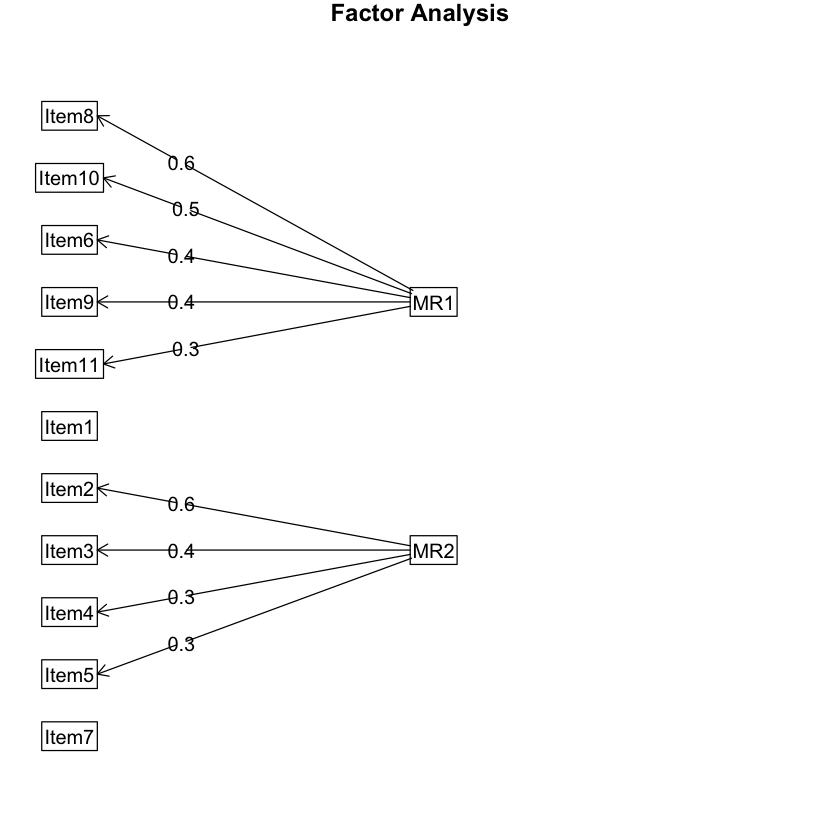

In [173]:
EFA_model <- fa(data,2,rotate="oblimin")
fa.diagram(EFA_model)

# Scale - Factor 1

In [8]:
factor1 <- select(data, 6,8,9,10,11) #each number refers to the column

Warning message:
“`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


ERROR: Error in UseMethod("select_"): no applicable method for 'select_' applied to an object of class "c('matrix', 'array', 'double', 'numeric')"


In [135]:
psych::alpha(factor1)


Reliability analysis   
Call: psych::alpha(x = factor1)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.55      0.57    0.52      0.21 1.3 0.013  2.8 0.3      0.2

 lower alpha upper     95% confidence boundaries
0.53 0.55 0.58 

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
Item6       0.50      0.52    0.45      0.21 1.06    0.015 0.0058  0.20
Item8       0.45      0.46    0.40      0.18 0.87    0.017 0.0011  0.19
Item9       0.51      0.53    0.47      0.22 1.13    0.015 0.0058  0.20
Item10      0.47      0.47    0.41      0.18 0.90    0.016 0.0029  0.17
Item11      0.55      0.56    0.49      0.24 1.26    0.014 0.0037  0.22

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
Item6  2844  0.62  0.60  0.42   0.32  2.7 0.53
Item8  2844  0.68  0.66  0.54   0.39  2.7 0.55
Item9  2844  0.56  0.58  0.38   0.28  2.8 0.47
Item10 2844  0.59  0.65  0.52   0.39  2.9 0.37
Item11 2844  0.56 


Three factors are required for identification -- general factor loadings set to be equal. 
Proceed with caution. 
Think about redoing the analysis with alternative values of the 'option' setting.




Omega 
Call: omegah(m = m, nfactors = nfactors, fm = fm, key = key, flip = flip, 
    digits = digits, title = title, sl = sl, labels = labels, 
    plot = plot, n.obs = n.obs, rotate = rotate, Phi = Phi, option = option, 
    covar = covar)
Alpha:                 0.55 
G.6:                   0.55 
Omega Hierarchical:    0.26 
Omega H asymptotic:    0.45 
Omega Total            0.59 

Schmid Leiman Factor loadings greater than  0.2 
           g   F1*   F2*   h2   u2   p2
Item1                    0.07 0.93 0.40
Item2-  0.30       -0.48 0.32 0.68 0.28
Item3-  0.25       -0.37 0.20 0.80 0.30
Item4-  0.20       -0.29 0.12 0.88 0.32
Item5-  0.21       -0.26 0.12 0.88 0.38
Item6   0.26  0.35       0.19 0.81 0.35
Item7-                   0.04 0.96 0.03
Item8   0.30  0.51       0.35 0.65 0.27
Item9   0.21  0.32       0.15 0.85 0.31
Item10  0.31  0.46       0.31 0.69 0.30
Item11        0.28       0.11 0.89 0.26

With eigenvalues of:
   g  F1*  F2* 
0.59 0.83 0.56 

general/max  0.72   max/min 

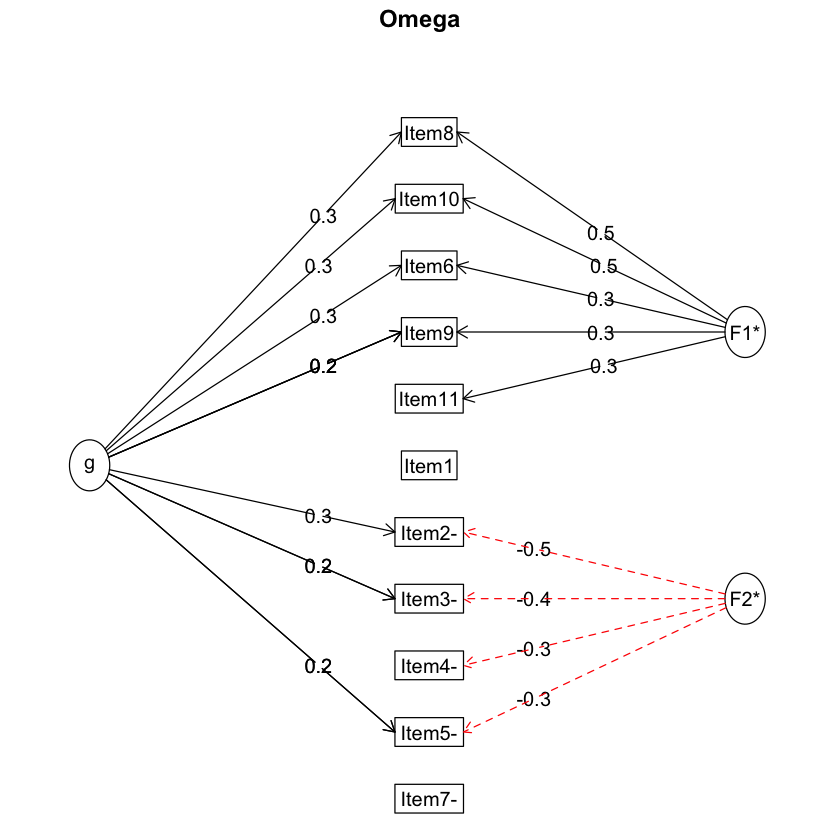

In [136]:
omega(cor(data),nfactors=2,fm="pa")

In [137]:
factor2 <- select(data, 2,3,4,5) #each number refers to the column
psych::alpha(factor2)


Reliability analysis   
Call: psych::alpha(x = factor2)

  raw_alpha std.alpha G6(smc) average_r  S/N   ase mean   sd median_r
      0.44      0.46     0.4      0.18 0.85 0.017  1.7 0.37     0.17

 lower alpha upper     95% confidence boundaries
0.4 0.44 0.47 

 Reliability if an item is dropped:
      raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
Item2      0.31      0.32    0.24      0.14 0.47    0.022 0.0009  0.15
Item3      0.34      0.35    0.27      0.15 0.55    0.021 0.0021  0.18
Item4      0.42      0.44    0.35      0.21 0.78    0.019 0.0044  0.18
Item5      0.41      0.44    0.35      0.20 0.77    0.019 0.0047  0.18

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
Item2 2844  0.62  0.67  0.49   0.32  1.7 0.53
Item3 2844  0.58  0.64  0.44   0.29  1.9 0.51
Item4 2844  0.64  0.58  0.31   0.21  1.6 0.71
Item5 2844  0.61  0.58  0.31   0.21  1.7 0.66

Non missing response frequency for each item
         1    2    3 miss
Item2 0.31 0.65 0.04    0

In [177]:
setwd("/Users/mayanksharma/Desktop/SEL Screener")

In [1]:
loadings.m<-read.csv("factorloadings.csv")

Warning message in file(file, "rt"):
“cannot open file 'factorloadings.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [2]:
library(reshape2)
library(ggplot2)

tiff("plot.tiff", units="in", width=5, height=5, res=300)

ggplot(loadings.m, aes(Items, abs(Loading), fill=Loading)) + 
  facet_wrap(~ Factor, nrow=1) + #place the factors in separate facets
  geom_bar(stat="identity") + #make the bars
  coord_flip() + #flip the axes so the test names can be horizontal  
  #define the fill color gradient: blue=positive, red=negative
  scale_fill_gradient2(name = "Loading", 
                       high = "orange", mid = "white", low = "red", 
                       midpoint=0, guide=F) 
dev.off()

ERROR: Error in ggplot(loadings.m, aes(Items, abs(Loading), fill = Loading)): object 'loadings.m' not found


In [180]:
tiff("plot.tiff", units="in", width=5, height=3, res=300)



ggplot(loadings.m, aes(abs(Loading), Items, fill=Factor)) + 
  geom_bar(stat="identity", aes(fill = abs(Loading) > 0.32 )) +
  facet_grid(. ~ Factor)+
  xlab("Loading Strength") +
  theme(text = element_text(size=10))+
  theme_bw(base_size=10)+
  geom_vline(xintercept = 0.32, color = "yellow", size=0.5) +
  scale_fill_manual(values = c('violetred1', 'violetred4') )+
  theme(axis.text.x = element_text(color = "grey20", size = 7, angle = 90, hjust = .5, vjust = .5, face = "plain",family="serif"),
        axis.text.y = element_text(color = "grey20", size = 7, angle = 0, hjust = 1, vjust = 0, face = "plain",family="serif"),  
        axis.title.x = element_text(color = "grey20", size = 7, angle = 0, hjust = .5, vjust = 0, face = "plain",family="serif"),
        axis.title.y = element_text(color = "grey20", size = 7, angle = 90, hjust = .5, vjust = .5, face = "plain",family="serif"))

dev.off()



pdf 
  2

# CFA

In [125]:
setwd("/Users/mayanksharma/Desktop/SEL Screener/Final Student Qnnaire")
data=read.csv("CFAData.csv")

In [88]:
ABC=read.csv("pseo_rel.csv")
ABC.pc <- polychoric(ABC)
alpha(ABC.pc$rho)

[1] "#000000"   "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00"
 [7] "#000000"   "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00"
[13] "#000000"   "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00"
[19] "#000000"   "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00" "#FFFFFF00"
[25] "#000000"

In [22]:
omega(ABC.pc$rho,nfactors = 1)

Omega_h for 1 factor is not meaningful, just omega_t

Warning message in schmid(m, nfactors, fm, digits, rotate = rotate, n.obs = n.obs, :
“Omega_h and Omega_asymptotic are not meaningful with one factor”
Warning message in cov2cor(t(w) %*% r %*% w):
“diag(.) had 0 or NA entries; non-finite result is doubtful”


Omega 
Call: omegah(m = m, nfactors = nfactors, fm = fm, key = key, flip = flip, 
    digits = digits, title = title, sl = sl, labels = labels, 
    plot = plot, n.obs = n.obs, rotate = rotate, Phi = Phi, option = option, 
    covar = covar)
Alpha:                 0.7 
G.6:                   0.68 
Omega Hierarchical:    0.72 
Omega H asymptotic:    1.01 
Omega Total            0.71 

Schmid Leiman Factor loadings greater than  0.2 
          g  F1*   h2   u2 p2
Item6  0.45      0.20 0.80  1
Item8  0.68      0.46 0.54  1
Item9  0.50      0.25 0.75  1
Item10 0.85      0.73 0.27  1
Item11 0.36      0.13 0.87  1

With eigenvalues of:
  g F1* 
1.8 0.0 

general/max  Inf   max/min =   NaN
mean percent general =  1    with sd =  0 and cv of  0 
Explained Common Variance of the general factor =  1 

The degrees of freedom are 5  and the fit is  0.05 

The root mean square of the residuals is  0.05 
The df corrected root mean square of the residuals is  0.07

Compare this with the adequacy of j

In [126]:
model <- 'ProsocialOrientations=~Item6+Item8+Item9+Item10+Item11
          ProsocialChallenges=~Item2+Item3+Item4'
      

In [121]:
data$Item2<- factor(data$Item2, ordered = TRUE, levels = c("1", "2","3"))
data$Item3<- factor(data$Item3, ordered = TRUE, levels = c("1", "2","3"))
data$Item4<- factor(data$Item4, ordered = TRUE, levels = c("1", "2","3"))
data$Item6<- factor(data$Item6, ordered = TRUE, levels = c("1", "2","3"))

data$Item8<- factor(data$Item8, ordered = TRUE, levels = c("1", "2","3"))
data$Item9<- factor(data$Item9, ordered = TRUE, levels = c("1", "2","3"))


data$Item10<- factor(data$Item10, ordered = TRUE, levels = c("1", "2","3"))
data$Item11<- factor(data$Item11, ordered = TRUE, levels = c("1", "2","3"))

data$Gender=as.factor(data$Gender)

In [118]:
library(semTools)
measurementInvarianceCat(model = model, data=data, group="Gender",missing="pairwise",fit.measures = c("cfi","tli","ifi","gfi","rmsea","srmr"))

Warning message:
“The measurementInvarianceCat function is deprecated, and it will cease to be included in future versions of semTools. See help('semTools-deprecated) for details.”



Measurement invariance models:

Model 1 : fit.configural
Model 2 : fit.loadings
Model 3 : fit.thresholds
Model 4 : fit.means

Scaled Chi-Squared Difference Test (method = “satorra.2000”)

lavaan NOTE:
    The “Chisq” column contains standard test statistics, not the
    robust test that should be reported per model. A robust difference
    test is a function of two standard (not robust) statistics.
 
               Df AIC BIC   Chisq Chisq diff Df diff Pr(>Chisq)    
fit.configural 38          85.751                                  
fit.loadings   44         103.299     17.261       6    0.00837 ** 
fit.thresholds 50         132.816     39.448       6  5.846e-07 ***
fit.means      52         179.992     30.564       2  2.307e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Fit measures:

                 cfi   tli   ifi   gfi rmsea  srmr cfi.delta tli.delta
fit.configural 0.964 0.947 0.965 0.993 0.041 0.061        NA        NA
fit.loadings   0.955 0.943 0.

In [114]:
library(semTools)
library(lavaan)
htmt(model, data =data, sample.cov = NULL, missing = "listwise",
  ordered = NULL, absolute = TRUE)

,ProsocialOrientations,ProsocialChallenges
ProsocialOrientations,1.0000000,0.3228443
ProsocialChallenges,0.3228443,1.0000000


In [123]:
fit <- cfa(model, data=data, 
           std.lv=TRUE,test="Satorra.Bentler")

In [116]:
reliability(fit)

For constructs with categorical indicators, the alpha and the average variance extracted are calculated from polychoric (polyserial) correlations, not from Pearson correlations.




,ProsocialOrientations,ProsocialChallenges
alpha,0.6963453,0.5773314
omega,0.5208622,0.4749395
omega2,0.5208622,0.4749395
omega3,0.5220521,0.4817764
avevar,0.3597480,0.3630037


In [107]:
summary(fit, fit.measures=TRUE, standardized=TRUE,rsquare=TRUE)

lavaan 0.6-7 ended normally after 16 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         25
                                                      
  Number of observations                          1508
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                62.078      80.530
  Degrees of freedom                                19          19
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.771
       Satorra-Bentler correction                                 

Model Test Baseline Model:

  Test statistic                              1284.400    1284.400
  Degrees of freedom                                28          28
  P-value                        

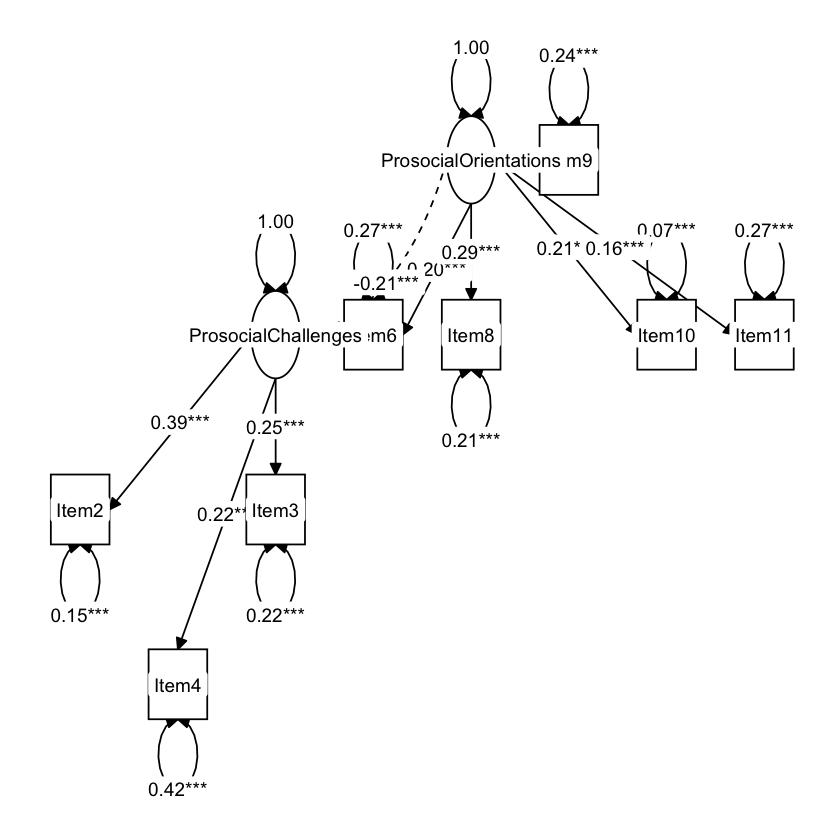

In [171]:
library(tidySEM)
library(lavaan)
library(ggplot2)
library(dplyr)
graph_sem(model = fit)

In [179]:
lay <- get_layout("", "","","","","ProsocialOrientations","","ProsocialChallenges", "","","","","",
                  "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8", "Item9","Item10","Item11", rows = 2)

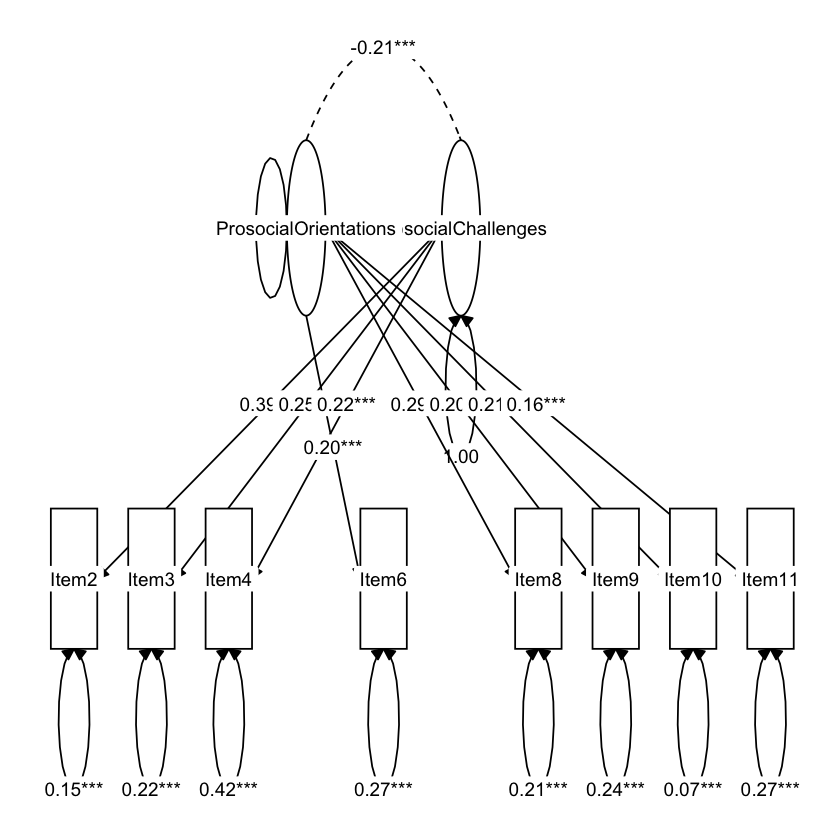

In [180]:
graph_sem(fit, layout = lay)

In [127]:
library(semTools)
measurementInvariance(model = model, data = data, group = "Gender",missing="pairwise",method = "satorra.bentler.2001",fit.measures = c("cfi","gfi","rmsea","srmr"))

Warning message:
“The measurementInvariance function is deprecated, and it will cease to be included in future versions of semTools. See help('semTools-deprecated) for details.”
Warning message in lavaan::lavTestLRT(...):
“lavaan WARNING: method = “satorra.bentler.2001”
	 but no robust test statistics were used;
	 switching to the standard chi-square difference test”



Measurement invariance models:

Model 1 : fit.configural
Model 2 : fit.loadings
Model 3 : fit.intercepts
Model 4 : fit.means

Chi-Squared Difference Test

               Df   AIC   BIC  Chisq Chisq diff Df diff Pr(>Chisq)    
fit.configural 38 17840 18106 108.50                                  
fit.loadings   44 17843 18077 123.30     14.798       6    0.02189 *  
fit.intercepts 50 17882 18084 174.20     50.898       6  3.105e-09 ***
fit.means      52 17906 18098 202.75     28.551       2  6.314e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Fit measures:

                 cfi   gfi rmsea  srmr cfi.delta gfi.delta rmsea.delta
fit.configural 0.915 0.999 0.050 0.036        NA        NA          NA
fit.loadings   0.905 0.999 0.049 0.041     0.011         0       0.001
fit.intercepts 0.851 0.999 0.057 0.048     0.054         0       0.009
fit.means      0.819 0.999 0.062 0.054     0.032         0       0.005
               srmr.delta
fit.configural         N